In [120]:
import pandas as pd
import numpy as np 
import seaborn as sns


In [121]:
data=pd.read_csv('winemag-data_first150k.csv')
data.head()

#i want to remove first column from data    
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

#Now I want to check any null values in the data
data.isnull().sum()



country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [122]:
data.head()
data['designation'].unique()
data['price'].unique()
data['region_1'].unique()
data['region_2'].unique()
data.shape

(150930, 10)

In [123]:
data['designation'].isnull().sum()
#There are 45 thousand seven hundered and 35 NUll values present in Data

data=data.dropna()
data.isnull().sum()

data.shape

#there are outliers present in The price Column

data.describe()

,points,price
count,39241.000000,39241.000000
mean,88.359981,37.546316
std,3.438542,26.716547
min,80.000000,4.000000
25%,86.000000,22.000000
50%,88.000000,32.000000
75%,91.000000,45.000000
max,100.000000,2013.000000


In [124]:
data.boxplot()

<AxesSubplot:>

In [125]:
mean=data['price'].mean()
std=data['price'].std()

outliers = data['price'][(data['price'] < mean - 3 * std) | (data['price'] > mean + 3 * std)]
#now print the outliers




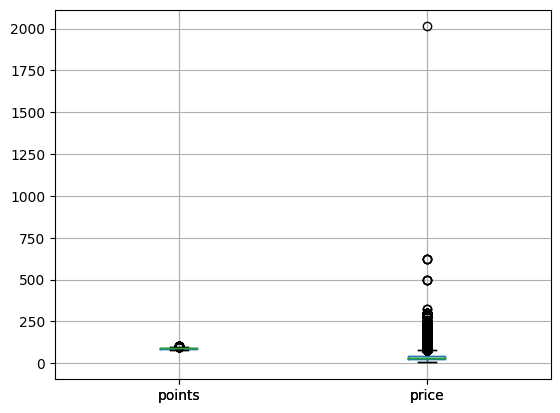

In [126]:
import matplotlib.pyplot as plt
#remove the outliers in the price column of data
data.describe()

new_data=data.copy()

data=data[data['price']<750]

data.boxplot()
plt.show()



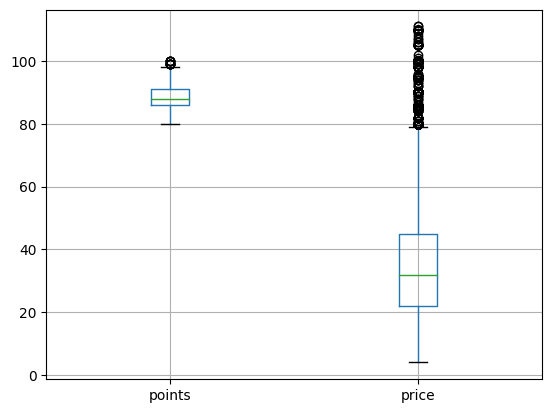

In [127]:
data.describe()

#now I'm removing the outliers by calculating the z score
z_scores = data["price"].apply(lambda x: (x - data["price"].mean()) / data["price"].std())
data=data[z_scores<3]
data.describe()

data.boxplot()
plt.show()


Visualizations

In [128]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38596 entries, 2 to 150916
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      38596 non-null  object 
 1   description  38596 non-null  object 
 2   designation  38596 non-null  object 
 3   points       38596 non-null  int64  
 4   price        38596 non-null  float64
 5   province     38596 non-null  object 
 6   region_1     38596 non-null  object 
 7   region_2     38596 non-null  object 
 8   variety      38596 non-null  object 
 9   winery       38596 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.2+ MB


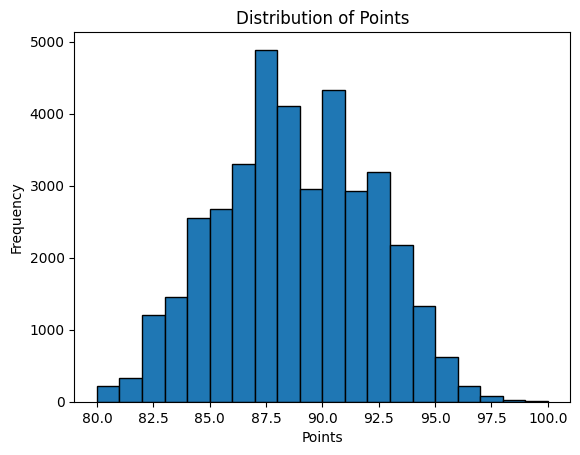

In [129]:
# Plotting a histogram of points
plt.hist(data['points'], bins=20, edgecolor='black')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Distribution of Points')
plt.show()

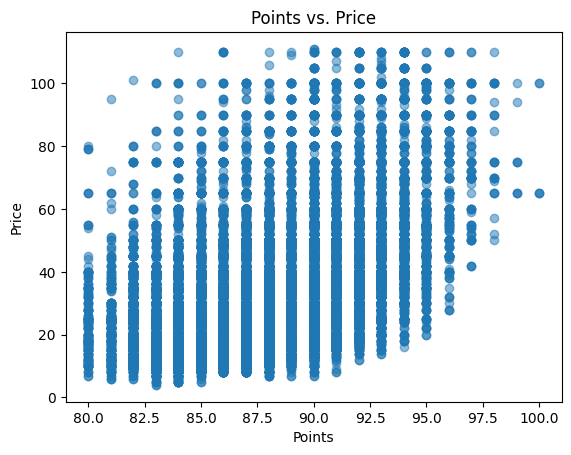

In [130]:
# Plotting a scatter plot of points vs. price
plt.scatter(data['points'], data['price'], alpha=0.5)
plt.xlabel('Points')
plt.ylabel('Price')
plt.title('Points vs. Price')
plt.show()

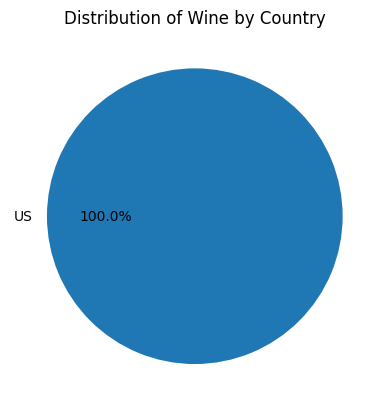

In [131]:
data['country'].unique()
country_shares = data['country'].value_counts(normalize=True)

plt.pie(country_shares, labels=country_shares.index, autopct='%1.1f%%')
plt.title('Distribution of Wine by Country')
plt.show()

#we can see 100% wine is from USA Not from remaining world


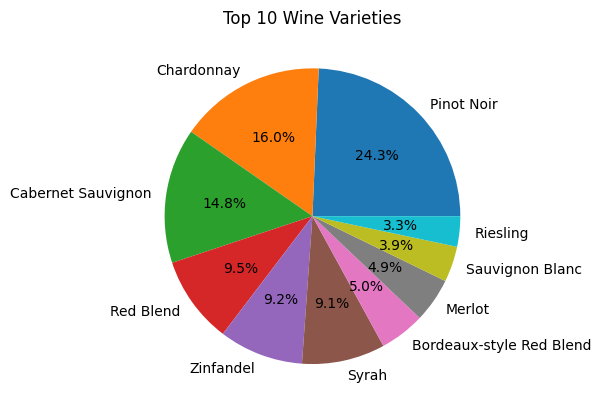

In [132]:
# Plotting a pie chart of the variety distribution
variety_counts = data['variety'].value_counts().head(10)
plt.pie(variety_counts, labels=variety_counts.index, autopct='%1.1f%%')
plt.title('Top 10 Wine Varieties')
plt.show()



In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38596 entries, 2 to 150916
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      38596 non-null  object 
 1   description  38596 non-null  object 
 2   designation  38596 non-null  object 
 3   points       38596 non-null  int64  
 4   price        38596 non-null  float64
 5   province     38596 non-null  object 
 6   region_1     38596 non-null  object 
 7   region_2     38596 non-null  object 
 8   variety      38596 non-null  object 
 9   winery       38596 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.2+ MB


In [134]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# # Normalize the numerical features
# normalized_features = scaler.fit_transform(data[['points', 'price']])
# normalized_data = pd.DataFrame(normalized_features, columns=['points', 'price'])

# normalized_data.head() 

In [135]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
data['country_encoded'] = label_encoder.fit_transform(data['country'])
data['province_encoded'] = label_encoder.fit_transform(data['province'])
data['variety_encoded'] = label_encoder.fit_transform(data['variety'])
data['winery_encoded'] = label_encoder.fit_transform(data['winery'])


data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,country_encoded,province_encoded,variety_encoded,winery_encoded
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,0,0,129,1815
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,0,2,109,2313
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,0,2,109,287
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,0,0,109,334
11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars,0,2,109,2214


In [136]:
# Drop the original categorical columns
data = data.drop(['country', 'province', 'variety', 'winery'], axis=1)

data.head()

,description,designation,points,price,region_1,region_2,country_encoded,province_encoded,variety_encoded,winery_encoded
2,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,Knights Valley,Sonoma,0,0,129,1815
3,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Willamette Valley,Willamette Valley,0,2,109,2313
8,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Chehalem Mountains,Willamette Valley,0,2,109,287
9,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,Sonoma Coast,Sonoma,0,0,109,334
11,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Ribbon Ridge,Willamette Valley,0,2,109,2214


In [ ]:
# I will drop the region_1 and region_2 now
data.drop(columns=['region_1','region_2','description','designation'],inplace=True)


In [146]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38596 entries, 2 to 150916
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   points            38596 non-null  int64  
 1   price             38596 non-null  float64
 2   country_encoded   38596 non-null  int32  
 3   province_encoded  38596 non-null  int32  
 4   variety_encoded   38596 non-null  int32  
 5   winery_encoded    38596 non-null  int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 1.5 MB


Splitting the Data 

In [158]:
from sklearn.model_selection import train_test_split
x=data.drop(columns='price')
y=data['price']

#train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)



In [163]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler

# Create the base models
model1 = RandomForestRegressor()
model2 = XGBRegressor()

# Create the ensemble model
ensemble_model = VotingRegressor(estimators=[('rf', model1), ('xgb', model2)])

# Extract the target variable
y_train_single = y_train  # Replace 'target_variable_name' with the actual name of your target variable


# Train the ensemble model
ensemble_model.fit(X_train, y_train_single)

print(X_test)
# Make predictions on the testing data
predictions = ensemble_model.predict(X_test)




        points  country_encoded  province_encoded  variety_encoded  \
19349       89                0                 0              143   
121973      87                0                 0              109   
11345       85                0                 0               22   
19454       94                0                 3               53   
66177       92                0                 2              109   
...        ...              ...               ...              ...   
74157       90                0                 3               22   
88082       85                0                 3               37   
148315      92                0                 3              115   
5559        87                0                 0               22   
53386       86                0                 0              109   

        winery_encoded  
19349             2941  
121973            2443  
11345              642  
19454             1215  
66177              761  
...      

In [162]:
r2_score(y_test, predictions) 

0.6729296540663037